# Lab 1

## Introduction
This is a basic introduction to IPython and pandas functionality. <a href="http://pandas.pydata.org/">Pandas</a> (Python Data Analysis Library) "is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." It (pandas) provides <a href="http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe">dataframe</a> functionality for reading/accessing/manipulating data in memory. You can think of a data frame as a table of indexed values.

What you're currently looking at is an IPython Notebook, this acts as a way to interactively use the python interpreter as well as a way to display graphs/charts/images/markdown along with code. IPython is commonly used in scientific computing due to its flexibility. Much more information is available on the <a href='http://ipython.org/'>IPython</a> website.

Often data is stored in files, and the first goal is to get that information off of disk and into a dataframe. Since we're working with limited resources in this VM we'll have to use samples of some of the files. Don't worry though, the same techniques apply if you're not sampling the files for exploration.

## Tip
If you ever want to know the various keyboard shortcuts, just click on a (non-code) cell or the text "In []" to the left of the cell, and press the *H* key. Or select *Help* from the menu above, and then *Keyboard Shortcuts*.
___

## Exercises

### File sampling
First off, let's take a look at a log file generated from <a href="http://www.bro.og/">Bro</a> this log is similar to netflow logs as well. However, this log file is rather large and doesn't fit in memory.

As part of the first exercise, figure out what setting the variable **sample_percent** should be in order to read in between 200k and 300k worth of (randomly selected) lines from the file. Change the variable, after doing that either click the *play* button above (it's the arrow) or hit the *[Shift]+[Enter]* keys as the same time.

In [1]:
from __future__ import print_function

In [35]:
import random
random.seed(1)
logfile = '/Users/madjl/GoogleDrive/University/Cyber/DataScience/Lectures/Content/data/conn_sample.log'
sample_percent = 1
num_lines = sum(1 for line in open(logfile))
slines = set(sorted(random.sample(range(num_lines), int(num_lines * sample_percent))))
print(str(num_lines)+" lines in "+logfile+", using a sample of "+str(len(slines))+" lines")

226943 lines in /Users/madjl/GoogleDrive/University/Cyber/DataScience/Lectures/Content/data/conn_sample.log, using a sample of 226943 lines


### File Creation
Awesome! Now that you have a subset of lines to work with, let's write them to another file so we'll have something to practice reading in. Simply hit *[Shift]+[Enter]* below to run the code in the cell and create a new file.

In [36]:
outfile = 'conn_sample.log'

In [37]:
f = open(outfile, 'w+')
i = open(logfile, 'r+')
linecount = 0
for line in i:
    if linecount in slines:
        f.write(line)
    linecount += 1
f.close()
i.close()

### File Input (CSV)
This next cell does a couple of things, first it imports pandas so we can create a dataframe, and then it reads our newly created file from above into memory. You can see the separator is specified to "\t" because Bro produces tab-delimited files by default. In this case we've also specified what we should call the columns in the dataframe.

In [38]:
import pandas as pd
conn_df = pd.read_csv(outfile, sep="\t", header=None, names=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','proto','service','duration','orig_bytes','resp_bytes','conn_state','local_orig','missed_bytes','history','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','tunnel_parents','threat','sample'])

### Verifying Input
Now (in theory) the contents of the file should be in a nicely laid-out dataframe.

For this next exercise, experiment with calling the **head()** and **tail()** method to see the values at the beginning and end of the dataframe. You can also pass a number to **head()** and **tail()** to specify the number of lines you want to see. Remember to click *play* or press *[Shift]+[Enter]* to execute the code in the cell after you change it.

In [39]:
conn_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
0,1.331901e+09,CqEvE71FftcS0D7zM3,192.168.202.79,50593,192.168.229.251,80,tcp,http,0.020000,165,...,-,0,ShADfFa,4,381,3,382,(empty),NaN,NaN
1,1.331901e+09,Cck0UY3jmmuyDVgsZi,192.168.202.100,45679,192.168.27.203,23,tcp,-,0.010000,0,...,-,0,Sr,1,44,1,40,(empty),NaN,NaN
2,1.331901e+09,CEyHIk4u2L9KlqFuNl,192.168.202.76,51670,149.5.45.166,443,tcp,-,-,-,...,-,0,S,1,48,0,0,(empty),NaN,NaN
3,1.331901e+09,C32o1w47JHRaiNkRhk,192.168.202.76,51683,111.221.77.148,40004,tcp,-,3.010000,0,...,-,0,S,2,104,0,0,(empty),NaN,NaN
4,1.331901e+09,Ci9DCd3idxS5IC3Lai,192.168.202.79,53203,192.168.229.252,389,tcp,-,0.010000,40,...,-,0,ShADdFar,6,360,5,2583,(empty),NaN,NaN


### Data Summarization
Now create a new cell below this one. This can be accomplished by clicking on this cell once, and then clicking the *+* icon towards the top or selecting *Insert* from above and then selecting *Insert Cell Below*. After creating the new cell, it's time to learn about the **describe()** method that can be called on dataframes. This will give you a numeric summarization of all columns that contain numbers.

Try it out!

In [40]:
conn_df.describe()

,ts,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,threat,sample
count,2.269430e+05,226943.000000,226943.000000,226943.0,226943.000000,2.269430e+05,226943.000000,2.269430e+05,0.0,0.0
mean,1.331949e+09,42724.549980,20354.433906,0.0,1.813235,1.938409e+02,1.283723,2.534223e+02,NaN,NaN
std,4.271641e+04,15296.007136,20586.389532,0.0,157.018786,2.428806e+04,161.686809,3.703243e+04,NaN,NaN
min,1.331901e+09,3.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
25%,1.331908e+09,35945.500000,2126.000000,0.0,1.000000,4.400000e+01,0.000000,0.000000e+00,NaN,NaN
50%,1.331928e+09,44316.000000,10146.000000,0.0,1.000000,4.800000e+01,1.000000,4.000000e+01,NaN,NaN
75%,1.331997e+09,54466.000000,37524.500000,0.0,1.000000,6.000000e+01,1.000000,4.000000e+01,NaN,NaN
max,1.332018e+09,65535.000000,65535.000000,0.0,63284.000000,9.694344e+06,64592.000000,1.402328e+07,NaN,NaN


### Data Types
Wait a second, isn't the ts column supposed to be a timestamp? Perhaps this column would be better suited as a time data type vs. a number.

Run the cell below to see what type of information Python stored in each column.

In [41]:
conn_df.dtypes

ts                float64
uid                object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
proto              object
service            object
duration           object
orig_bytes         object
resp_bytes         object
conn_state         object
local_orig         object
missed_bytes        int64
history            object
orig_pkts           int64
orig_ip_bytes       int64
resp_pkts           int64
resp_ip_bytes       int64
tunnel_parents     object
threat            float64
sample            float64
dtype: object

### Converting Column Types
Time to change the ts column to a datetime object! We will accomplish that by using a simple function provided called *to_datetime()*. The cell below runs this function on the ts column (what should be a time stamp), and then re-assigns this column back to the dataframe in the same place. A new timestamp column could have been added to the dataframe as well so both the float value and the datetime object columns are present.

Run the cell below to convert the column type.

In [42]:
conn_df['ts'].values[1]

1331901002.24

In [43]:
from datetime import datetime
conn_df['ts'] = [datetime.fromtimestamp(float(date)) for date in conn_df['ts'].values]

In [44]:
conn_df['ts'].values[1]

numpy.datetime64('2012-03-16T12:30:02.240000000')

In [45]:
conn_df.dtypes

ts                datetime64[ns]
uid                       object
id.orig_h                 object
id.orig_p                  int64
id.resp_h                 object
id.resp_p                  int64
proto                     object
service                   object
duration                  object
orig_bytes                object
resp_bytes                object
conn_state                object
local_orig                object
missed_bytes               int64
history                   object
orig_pkts                  int64
orig_ip_bytes              int64
resp_pkts                  int64
resp_ip_bytes              int64
tunnel_parents            object
threat                   float64
sample                   float64
dtype: object

### Data Value Exploration
Verify that the conversion was successful. What is the datatype of the column now?

Scroll back up the page and note where you ran the **describe()** function. You'll see under the threat and sample columns there is likely the value of *NaN*. This stands for Not a Number and is a special value assigned to empty column values. There are a few ways to explore what values a column has. Two of these are **value_counts()** and **unique()**. 

Try them below on different columns. You can create new cells or if you want to get more than the last command worth of output you can put a print statement in front. 

What happens when you run them on a column with IPs (*id.orig_h, id.resp_h*)? What about sample or threat?

In [46]:
conn_df['sample'].unique()

array([ nan])

### Remove Columns
Another useful operation on a dataframe is removing and adding columns.  Since the threat and sample columns contain only *NaNs*, we can safely remove them and not impact any analysis that may be performed. 

Below the sample column is removed (dropped), add a similar line to drop the *threat* column and use a method from above to verify they are no longer in the dataframe.

In [47]:
conn_df.drop('sample', axis=1, inplace=True)

Can you think of other columns to remove? Select a few and remove them as well. What does your dataframe look like now? (Insert additional cells as needed)

In [48]:
conn_df.drop('threat', axis=1, inplace=True)

In [49]:
conn_df.drop('missed_bytes', axis=1, inplace=True)

### Table of what is in a column

In [50]:
conn_df.service.value_counts()

-           220182
http          4445
dns           1685
ssl            508
ssh             49
dhcp            28
ftp             25
ftp-data        19
smtp             2
Name: service, dtype: int64

### Row Selection

You can use column values to select rows from the dataframes (and even only view specific columns). First, select all rows that contain *SSL* traffic by running the cell below.

In [51]:
conn_df[conn_df['service'] == 'ssl'].head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
5483,2012-03-16 12:46:46.620,Cn2qZl218lJUnQDrwc,192.168.202.79,50766,192.168.229.254,443,tcp,ssl,0.220000,587,915,SF,-,ShADadfFr,16,1427,14,1651,(empty)
5519,2012-03-16 12:46:52.890,CcaNkl42DToOXsdA2k,192.168.202.79,50964,192.168.229.254,443,tcp,ssl,0.260000,546,1060,SF,-,ShADadfFr,15,1334,13,1744,(empty)
5520,2012-03-16 12:46:53.620,CksO1QvkaUUXb7y6c,192.168.202.79,50977,192.168.229.254,443,tcp,ssl,0.320000,546,1060,SF,-,ShADadfFr,15,1334,13,1744,(empty)
5736,2012-03-16 12:47:35.570,CwmS0u2f1SRXmZM2kb,192.168.202.79,52376,192.168.229.254,443,tcp,ssl,0.210000,532,1060,SF,-,ShADadfFr,15,1320,13,1744,(empty)
5765,2012-03-16 12:47:39.160,C27eNw2n4k0fGyZKkd,192.168.202.79,52564,192.168.229.254,443,tcp,ssl,0.260000,542,1060,SF,-,ShADadfrF,15,1330,13,1744,(empty)


In [52]:
conn_df2=conn_df[(conn_df['service'] == 'dns') | (conn_df['service'] == 'ssl')]
conn_df2.assign(total_bytes=conn_df2['orig_bytes']+conn_df2['resp_bytes']);
conn_df2.assign(total_pkts=conn_df2['orig_pkts']+conn_df2['resp_pkts']);

In [53]:
conn_df2.service.value_counts()

dns    1685
ssl     508
Name: service, dtype: int64

In [54]:
conn_df2.fillna(0).head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
50,2012-03-16 12:32:48.240,CLkwKgZLb2e4lKKch,192.168.202.80,59464,192.168.202.255,137,udp,dns,0.540000,150,0,S0,-,D,3,234,0,0,(empty)
64,2012-03-16 12:40:12.170,CtfpEp3XPTLCpGJo0h,192.168.202.95,54593,192.168.207.4,53,udp,dns,-,-,-,SF,-,Dd,1,65,1,122,(empty)
65,2012-03-16 12:40:24.150,CR3T7r164vZEqO2Pa8,192.168.202.87,57591,192.168.207.4,53,udp,dns,-,-,-,SF,-,Dd,1,68,1,125,(empty)
201,2012-03-16 12:42:27.490,Cz5EyCXIGdD0tDljl,192.168.202.97,137,192.168.202.255,137,udp,dns,17.600000,900,0,S0,-,D,18,1404,0,0,(empty)
754,2012-03-16 12:42:57.200,CqmVc91DFubvrtYqil,192.168.202.103,42627,192.168.207.4,53,udp,dns,-,-,-,SF,-,Dd,1,73,1,118,(empty)


In [55]:
conn_df2['orig_ip_bytes'].head()

50      234
64       65
65       68
201    1404
754      73
Name: orig_ip_bytes, dtype: int64

/Users/madjl/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


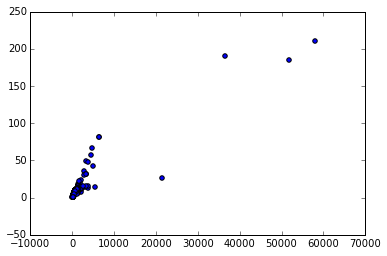

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(conn_df2['orig_ip_bytes'],conn_df2['orig_pkts']);
plt.show()

So this is our first plot, a scatter plot of bytes against packets.

In [57]:
conn_df[conn_df['service'] == 'dns'].head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
50,2012-03-16 12:32:48.240,CLkwKgZLb2e4lKKch,192.168.202.80,59464,192.168.202.255,137,udp,dns,0.540000,150,0,S0,-,D,3,234,0,0,(empty)
64,2012-03-16 12:40:12.170,CtfpEp3XPTLCpGJo0h,192.168.202.95,54593,192.168.207.4,53,udp,dns,-,-,-,SF,-,Dd,1,65,1,122,(empty)
65,2012-03-16 12:40:24.150,CR3T7r164vZEqO2Pa8,192.168.202.87,57591,192.168.207.4,53,udp,dns,-,-,-,SF,-,Dd,1,68,1,125,(empty)
201,2012-03-16 12:42:27.490,Cz5EyCXIGdD0tDljl,192.168.202.97,137,192.168.202.255,137,udp,dns,17.600000,900,0,S0,-,D,18,1404,0,0,(empty)
754,2012-03-16 12:42:57.200,CqmVc91DFubvrtYqil,192.168.202.103,42627,192.168.207.4,53,udp,dns,-,-,-,SF,-,Dd,1,73,1,118,(empty)


Next we can assign that result to a dataframe, and then look at all all the *SSL* connections that happen over ports other than 443.

In [58]:
ssl_df = conn_df[conn_df['service'] == 'ssl']
ssl_df[ssl_df['id.resp_p'] != 443].head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
29619,2012-03-16 13:20:57.740,C4XpLT0JNlGJoL8wc,192.168.202.110,48528,192.168.27.253,8089,tcp,ssl,0.040000,649,1816,RSTO,-,ShADadfR,7,1021,6,2136,(empty)
29736,2012-03-16 13:21:03.770,Cqobm814gfetUZNuud,192.168.202.110,48956,192.168.27.253,8089,tcp,ssl,0.050000,649,1816,RSTO,-,ShADadfR,7,1021,6,2136,(empty)
31077,2012-03-16 13:21:50.010,CbVHEP2NPUzMqOX5U7,192.168.202.110,54694,192.168.27.253,8089,tcp,ssl,0.050000,30,590,RSTO,-,ShADadR,5,298,3,754,(empty)
41490,2012-03-16 13:33:43.240,C22VQS2cRBRPdPAPs1,192.168.202.110,49037,192.168.27.253,8089,tcp,ssl,0.030000,713,1816,RSTO,-,ShADadfR,7,1085,6,2136,(empty)
41492,2012-03-16 13:33:43.750,CgDgVe3S9k5eLXIHsf,192.168.202.110,49082,192.168.27.253,8089,tcp,ssl,0.010000,681,1816,RSTO,-,ShADadfR,7,1053,6,2136,(empty)


You can see the individual column selections above eg: *conn_df['service']*, and *ssl_df['id.resp_p']* respectively. You can use these to view output of specific columns. 

For example, run the cell below to see all the individual values of originator bytes associated with a *SSL* connection over port 443.

In [33]:
ssl_df[ssl_df['id.resp_p'] == 443][['orig_bytes','proto']].head()

,orig_bytes,proto
401,681,tcp
985,665,tcp
1810,697,tcp


## Imported from later labs

In [108]:
conn_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,count
ts,,,,,,,,,,,,,,,,,,,
2012-03-16 12:30:00.830,CqEvE71FftcS0D7zM3,192.168.202.79,50593,192.168.229.251,80,tcp,http,0.020000,165,214,SF,-,ShADfFa,4,381,3,382,(empty),1
2012-03-16 12:30:02.240,Cck0UY3jmmuyDVgsZi,192.168.202.100,45679,192.168.27.203,23,tcp,-,0.010000,0,0,REJ,-,Sr,1,44,1,40,(empty),1
2012-03-16 12:30:16.130,CEyHIk4u2L9KlqFuNl,192.168.202.76,51670,149.5.45.166,443,tcp,-,-,-,-,S0,-,S,1,48,0,0,(empty),1
2012-03-16 12:30:24.360,C32o1w47JHRaiNkRhk,192.168.202.76,51683,111.221.77.148,40004,tcp,-,3.010000,0,0,S0,-,S,2,104,0,0,(empty),1
2012-03-16 12:30:55.530,Ci9DCd3idxS5IC3Lai,192.168.202.79,53203,192.168.229.252,389,tcp,-,0.010000,40,2327,RSTR,-,ShADdFar,6,360,5,2583,(empty),1


In [73]:
conn_df = conn_df.set_index('ts')

Populating the interactive namespace from numpy and matplotlib


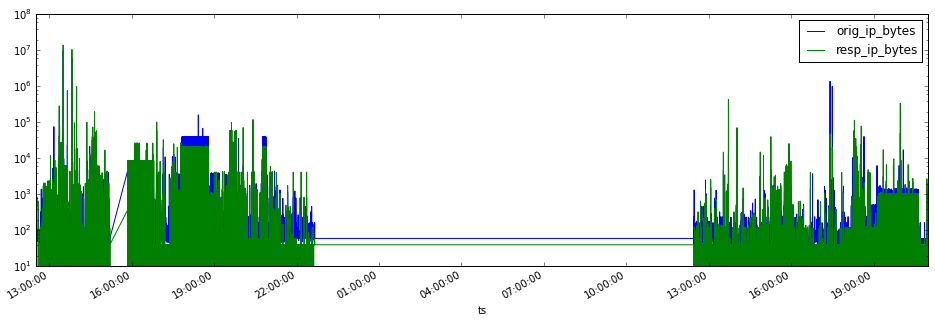

In [78]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
df = conn_df[['orig_ip_bytes','resp_ip_bytes']]

df.plot(logy=True);

/Users/madjl/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


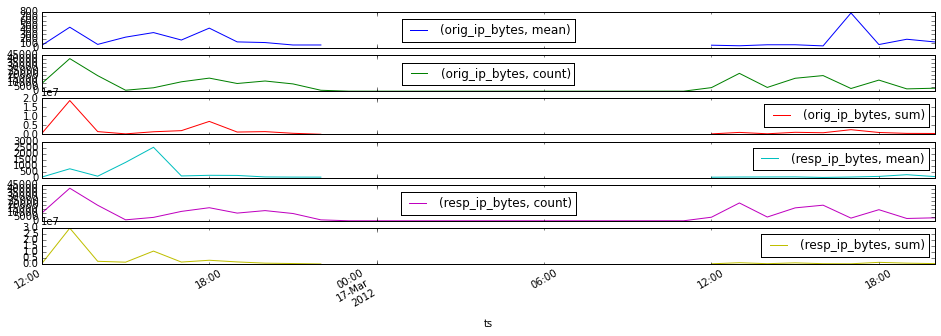

/Users/madjl/anaconda/lib/python3.4/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300
/Users/madjl/anaconda/lib/python3.4/site-packages/numpy/ma/core.py:867: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


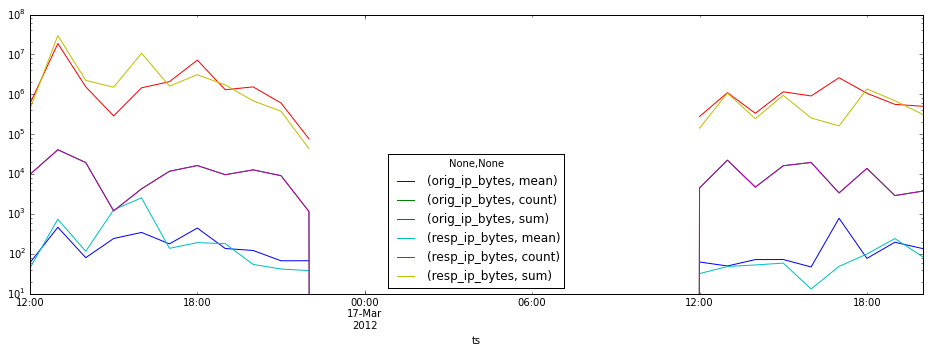

In [82]:
resamp = df.resample("H", how=['mean', 'count', 'sum'])
resamp.plot(subplots=True)
resamp.plot(logy=True)

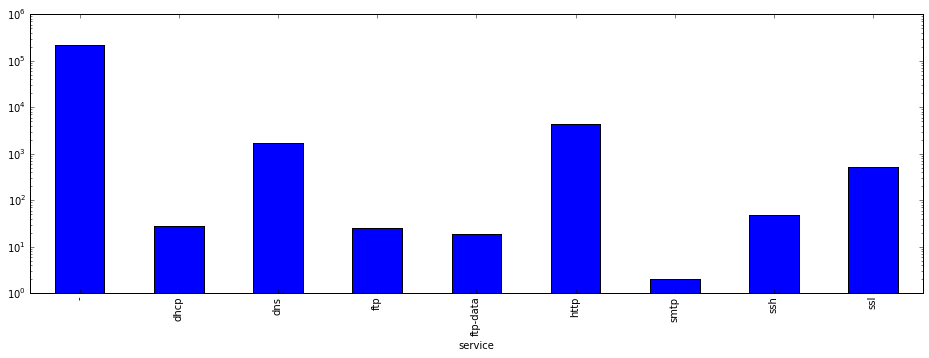

In [85]:
conn_df['count'] = 1
conn_df.groupby('service')['count'].sum().plot(kind='bar',logy=True)

ERROR! Session/line number was not unique in database. History logging moved to new session 54


/Users/madjl/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


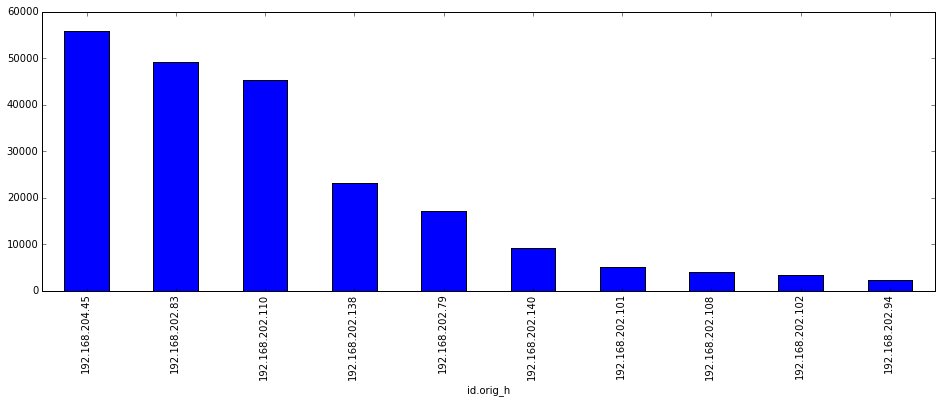

In [87]:
conn_df.groupby('id.orig_h')['count'].sum().order(ascending=False)[:10].plot(kind='bar')

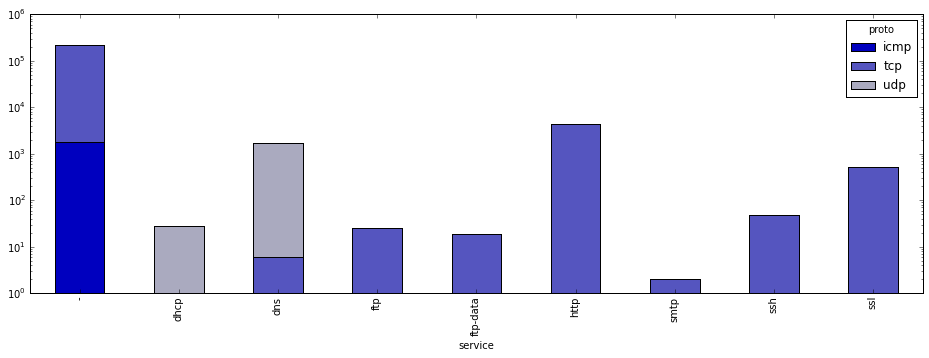

In [93]:
colors = [(x/3.0, x/3.0, 0.75) for x in range(len(conn_df['proto'].unique().tolist()))]
conn_df.groupby(['service','proto'])['count'].sum().unstack('proto').fillna(0).plot(
    color=colors, kind='bar', stacked=True, grid=False,logy=True)

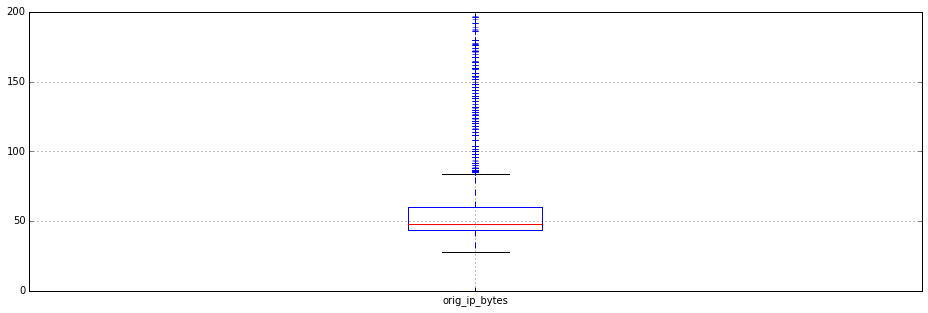

In [94]:
conn_df[conn_df.orig_ip_bytes < 200].boxplot(column='orig_ip_bytes')

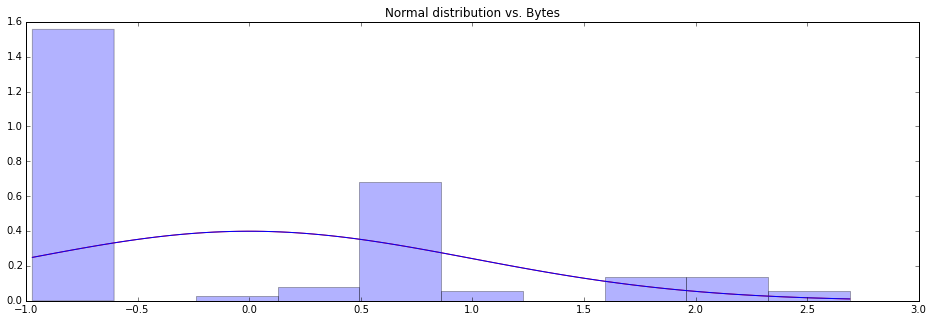

In [97]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title
from sklearn.preprocessing import scale
samp = scale(conn_df.orig_ip_bytes.tolist()[:100])

param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(min(samp),max(samp),len(samp))
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution vs. Bytes')
plot(x,pdf_fitted,'r-')
plot(x,pdf,'b-')
hist(samp,normed=1,alpha=.3)
show()

http://nbviewer.jupyter.org/url/secrepo.com/honeypot/BSidesDFW%20-%202014.ipynb

/Users/madjl/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:17: FutureWarning: sort(....) is deprecated, use sort_index(.....)
/Users/madjl/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(....) is deprecated, use sort_index(.....)
/Users/madjl/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


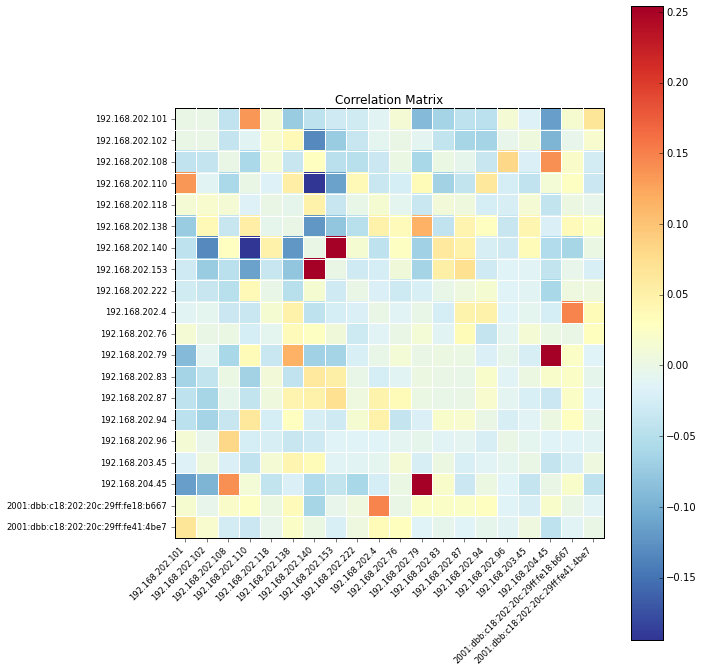

In [145]:
import pandas as pd 
cols = ['service','id.orig_h']
adf = pd.DataFrame()
adf = adf.append(conn_df[cols])
adf.reset_index(level=0, inplace=True)
subset = adf[['ts','service','id.orig_h']]
subset['count'] = 1
subset = subset.set_index('ts')
pivot = pd.pivot_table(subset, values='count', index=subset.index, columns=['id.orig_h'], fill_value=0)

grouped = pivot.groupby([(lambda x: x.minute), (lambda x: x.second)]).sum()

topN = subset['id.orig_h'].value_counts()[:20].index
corr_df = grouped[topN].corr()

import statsmodels.api as sm
corr_df.sort(axis=0, inplace=True) # Just sorting so exploits names are easy to find
corr_df.sort(axis=1, inplace=True)
corr_matrix = corr_df.as_matrix()
fill_diagonal(corr_matrix,0) ## MODIFICATION: The diagonal is too high and ruins the plot 
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
sm.graphics.plot_corr(corr_matrix, ynames=corr_df.index.tolist(), xnames=corr_df.columns.tolist())
plt.show()